<a href="https://colab.research.google.com/github/alifnadhifah/Pemrosesan-Citra-Digital/blob/main/Assignment_7_1301184255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
Nama  : Alif Ranadian Nadhifah
NIM   : 1301184255
Kelas : PCD IF-43-PIL-IS 01
```

# Referensi

1. https://www.sciencedirect.com/science/article/pii/S1877050920308747

# Tugas 1: Melakukan beberapa Morphological Operations pada image RGB berisi text nama

## Detail Tugas

Secara teknis untuk tugas 1 seperti ini
<ol type="1">
    <li>Buat sebuah gambar yang dibuat di MS word. Gambar tersebut merupakan text nama anda</li>
    <li>Baca image RGB</li>
    <li>konversi image RGB ke grayscale</li>
    <li>konversi image grayscale ke binary image</li>
    <li>Lakukan beberapa Morphological Operations pada binary image tersebut.</li>
    <ol type="a">
        <li>Dilasi</li>
        <li>Erosi</li>
        <li>Internal boundary</li>
        <li>External boundary</li>
        <li>Morphological Gradient</li>
        <li>Thinning</li>
        <li>Thichening</li>
        <li>Skeletonizing</li>
    </ol>
    <li>Simpan semua file input , semua file outputnya dan file .ipynb</li>
</ol>

## File Image

File Nametag.png

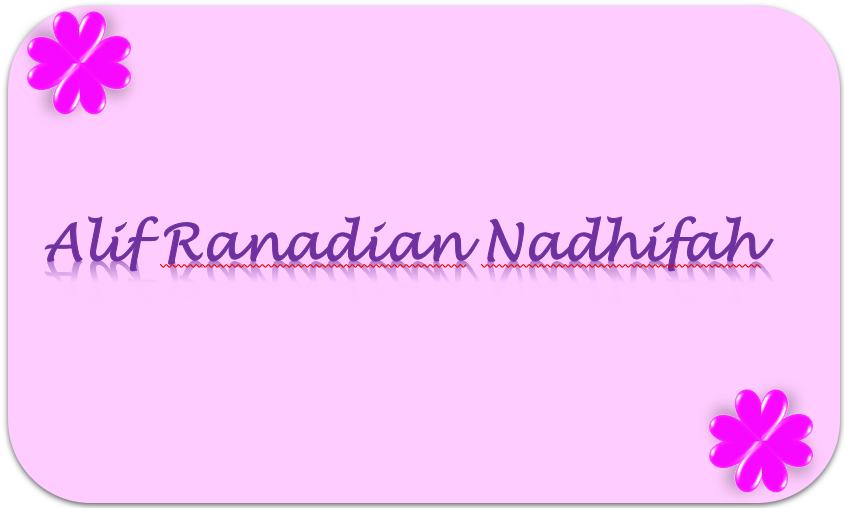

## Load Library

In [1]:
!wget --no-check-certificate \
    https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/blob/main/Nametag.png?raw=true -O Nametag.png

!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations
# from google.colab.patches import cv2_imshow

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2023-06-05 02:27:27--  https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/blob/main/Nametag.png?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/raw/main/Nametag.png [following]
--2023-06-05 02:27:27--  https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/raw/main/Nametag.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alifnadhifah/Pemrosesan-Citra-Digital/main/Nametag.png [following]
--2023-06-05 02:27:27--  https://raw.githubusercontent.com/alifnadhifah/Pemrosesan-Citra-Digital/main/Nametag.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

## Load File Original Image

In [2]:
# Membaca File Image
image_ori=cv2.imread('Nametag.png')

In [28]:
# Menampilkan informasi Image
print('Ukuran Image 1: ', image_ori.size)
print('Dimensi Image 1: ', image_ori.shape)
print('Tipe File Image 1: ', image_ori.dtype)

Ukuran Image 1:  1289304
Dimensi Image 1:  (508, 846, 3)
Tipe File Image 1:  uint8


Text(0.5, 1.0, 'Image 1 (Versi BGR)')

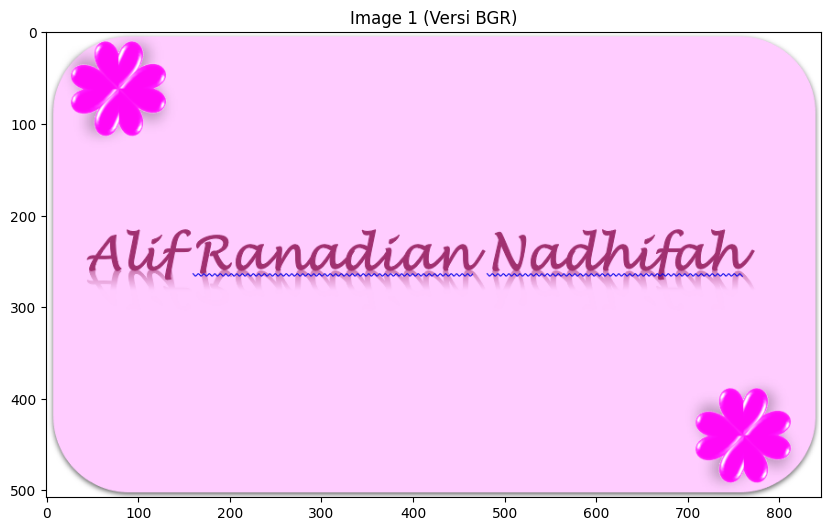

In [29]:
# Menampilkan Image Versi BGR
plt.imshow(image_ori)
plt.title("Image 1 (Versi BGR)")

## Baca image RGB

In [5]:
# Menampilkan Image versi RGB
image_rgb=cv2.cvtColor(image_ori, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Image 1 (Versi RGB)")

Text(0.5, 1.0, 'Image 1 (Versi RGB)')

## konversi image RGB ke grayscale

In [37]:
# Menampilkan Image versi Grayscale
image_gray=cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.title("Image 1 (Versi Grayscale)")

Text(0.5, 1.0, 'Image 1 (Versi Grayscale)')

## konversi image grayscale ke binary image

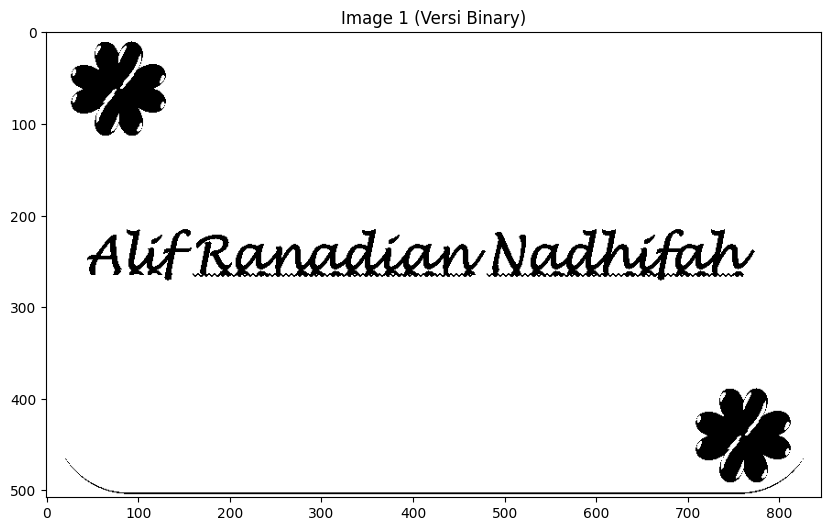

In [7]:
# Menentukan nilai ambang menggunakan metode Otsu
_, image_binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan binary Image
plt.imshow(image_binary, cmap='gray')
plt.title("Image 1 (Versi Binary)")
plt.show()

## Morphological Operations pada binary image

In [8]:
# Menampilkan informasi Binary Image
print('Ukuran Binary Image: ', image_binary.size)
print('Dimensi Binary Image: ', image_binary.shape)
print('Tipe File Binary Image: ', image_binary.dtype)

Ukuran Binary Image:  429768
Dimensi Binary Image:  (508, 846)
Tipe File Binary Image:  uint8


In [9]:
# Morphological Operations Versi Dilasi
kernel = np.ones((3, 3), np.uint8)
image_dilasi = cv2.dilate(image_binary, kernel, iterations=1)

# Morphological Operations Versi Erosi
image_erosi = cv2.erode(image_binary, kernel, iterations=1)

# Morphological Operations Versi Internal boundary
image_internalBoundary = image_binary - image_erosi

# Morphological Operations Versi External boundary
image_externalBoundary = image_dilasi - image_binary

# Morphological Operations Versi Morphological Gradient
image_morphologicalGradient = cv2.morphologyEx(image_binary, cv2.MORPH_GRADIENT, kernel)

# Morphological Operations Versi Thinning
image_thinning = cv2.ximgproc.thinning(image_binary)

# Morphological Operations Versi Thichening menggunakan versi Dilasi berulang untuk thichening
kernel = np.ones((3, 3), np.uint8)
iterations = 3  # Jumlah iterasi dilasi
image_thichening = cv2.dilate(image_binary, kernel, iterations=iterations)

# Morphological Operations Versi Skeletonizing
image_skeletonizing = cv2.ximgproc.thinning(image_binary, thinningType=cv2.ximgproc.THINNING_GUOHALL)

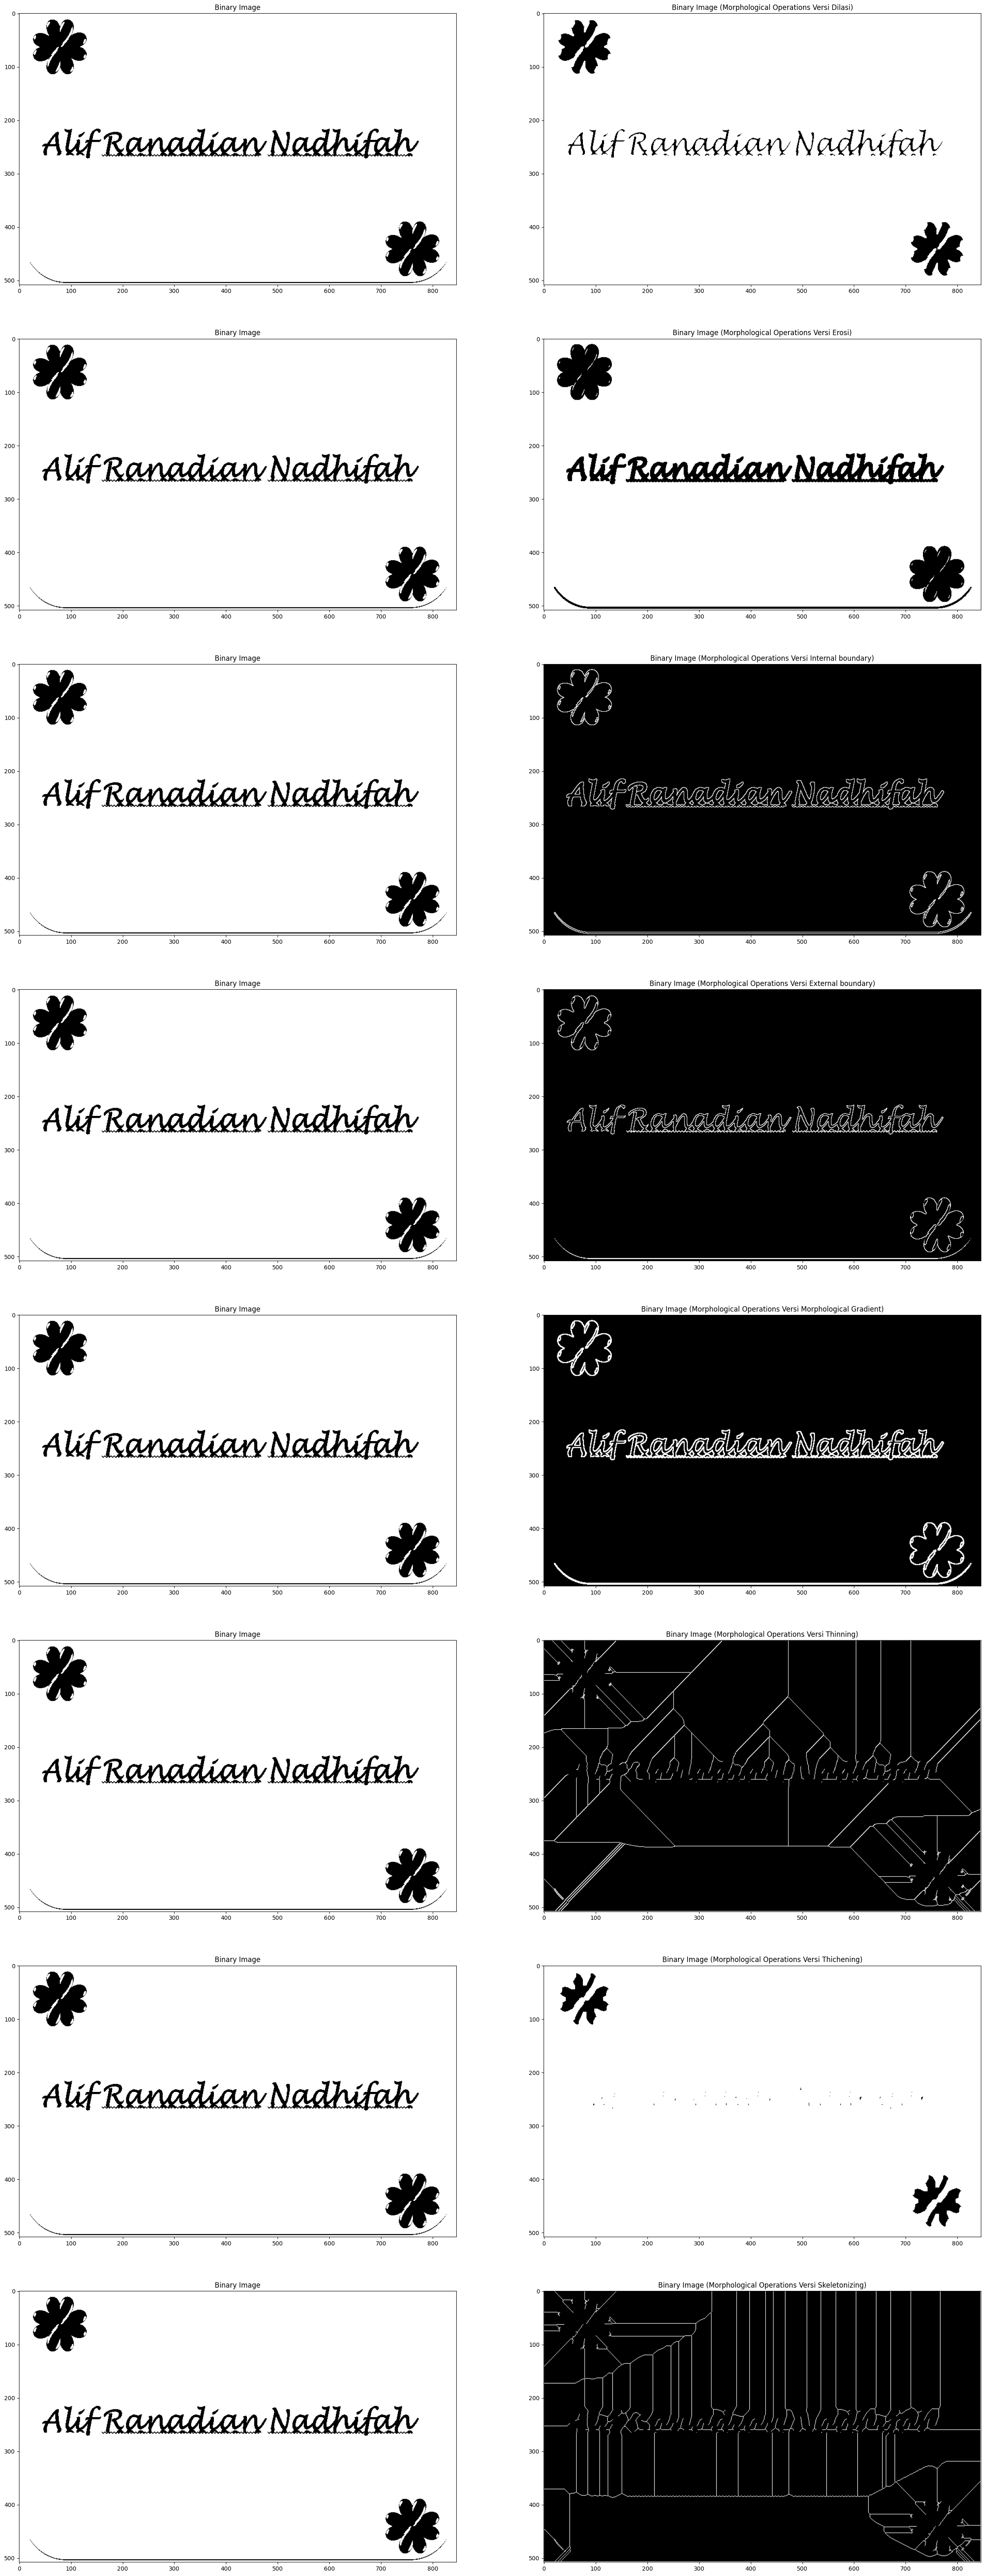

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16)) = plt.subplots(nrows=8, ncols=2, figsize=(30,80))

ax1.imshow(image_binary, aspect='auto', cmap='gray')
ax1.set_title("Binary Image")
ax2.imshow(image_dilasi, aspect='auto', cmap='gray')
ax2.set_title("Binary Image (Morphological Operations Versi Dilasi)")
ax3.imshow(image_binary, aspect='auto', cmap='gray')
ax3.set_title("Binary Image")
ax4.imshow(image_erosi, aspect='auto', cmap='gray')
ax4.set_title("Binary Image (Morphological Operations Versi Erosi)")
ax5.imshow(image_binary, aspect='auto', cmap='gray')
ax5.set_title("Binary Image")
ax6.imshow(image_internalBoundary, aspect='auto', cmap='gray')
ax6.set_title("Binary Image (Morphological Operations Versi Internal boundary)")
ax7.imshow(image_binary, aspect='auto', cmap='gray')
ax7.set_title("Binary Image")
ax8.imshow(image_externalBoundary, aspect='auto', cmap='gray')
ax8.set_title("Binary Image (Morphological Operations Versi External boundary)")
ax9.imshow(image_binary, aspect='auto', cmap='gray')
ax9.set_title("Binary Image")
ax10.imshow(image_morphologicalGradient, aspect='auto', cmap='gray')
ax10.set_title("Binary Image (Morphological Operations Versi Morphological Gradient)")
ax11.imshow(image_binary, aspect='auto', cmap='gray')
ax11.set_title("Binary Image")
ax12.imshow(image_thinning, aspect='auto', cmap='gray')
ax12.set_title("Binary Image (Morphological Operations Versi Thinning)")
ax13.imshow(image_binary, aspect='auto', cmap='gray')
ax13.set_title("Binary Image")
ax14.imshow(image_thichening, aspect='auto', cmap='gray')
ax14.set_title("Binary Image (Morphological Operations Versi Thichening)")
ax15.imshow(image_binary, aspect='auto', cmap='gray')
ax15.set_title("Binary Image")
ax16.imshow(image_skeletonizing, aspect='auto', cmap='gray')
ax16.set_title("Binary Image (Morphological Operations Versi Skeletonizing)")


plt.show() # Tampilkan hasilnya

## Menyimpan File Input

In [11]:
cv2.imwrite("input_bgr_image.png", image_ori)

True

In [12]:
cv2.imwrite("input_rgb_image.png", image_rgb)

True

In [13]:
cv2.imwrite("input_grayscale_image.png", image_gray)

True

In [14]:
cv2.imwrite("input_binary_image.png", image_binary)

True

## Menyimpan File Output

In [15]:
cv2.imwrite("output_MO_Dilasi_image.png", image_dilasi)

True

In [16]:
cv2.imwrite("output_MO_Erosi_image.png", image_erosi)

True

In [17]:
cv2.imwrite("output_MO_internalBoundary_image.png", image_internalBoundary)

True

In [18]:
cv2.imwrite("output_MO_externalBoundary_image.png", image_externalBoundary)

True

In [22]:
cv2.imwrite("output_MO_morphologicalGradient_image.png", image_morphologicalGradient)

True

In [19]:
cv2.imwrite("output_MO_thinning_image.png", image_thinning)

True

In [20]:
cv2.imwrite("output_MO_thichening_image.png", image_thichening)

True

In [21]:
cv2.imwrite("output_MO_skeletonizing_image.png", image_skeletonizing)

True

# Tugas 2: Melakukan proses Morphological Operations pada image cell darah http://users.cecs.anu.edu.au/~hrezatofighi/Data/LISC%20Database.zip sehingga dapat memudahkan  untuk dihitung berapa jumlah selnya

## Detail Tugas

Secara teknis untuk tugas 2 seperti ini

1. Download http://users.cecs.anu.edu.au/~hrezatofighi/Data/LISC%20Database.zip dan ektraksikan
2. ambil file sesuai urutan presensi anda di folder ./Main Dataset/mono (Presensi nomor 7)
3. Baca image RGB
4. konversi image RGB ke grayscale
5. konversi image grayscale ke binary
6. Gunakan berbagai metode image procesing termasuk Morphological Operations untuk membentuk  boundary pada cell darah
7. Bila memungkinkan silakan cari referensi untuk menghitung selnya. (tidak perlu pakai CNN). Bisa lihat https://www.sciencedirect.com/science/article/pii/S1877050920308747 untuk referensi.
8. Simpan semua file input , semua file outputnya dan file ipynb

## File Dataset

File 7.bmp

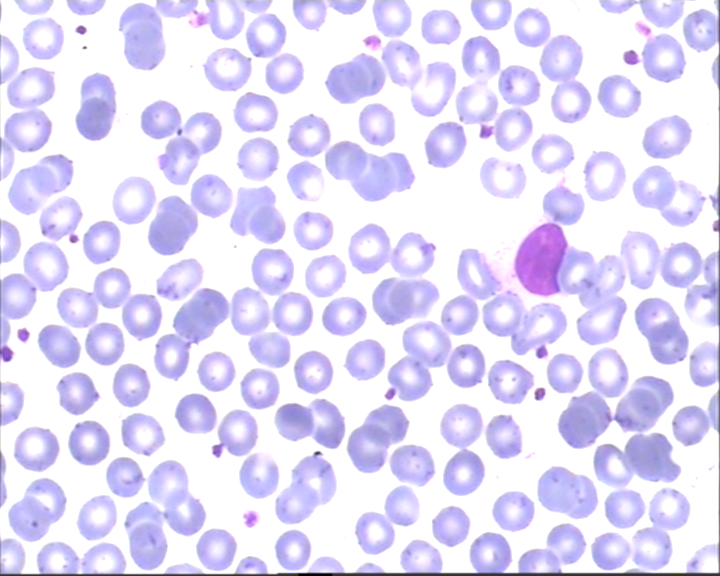

## Load Library

In [23]:
!wget --no-check-certificate \
    https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/blob/main/Main_Dataset-Mono-File7.bmp?raw=true -O 7.bmp

!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations
# from google.colab.patches import cv2_imshow

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2023-06-05 02:42:41--  https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/blob/main/Main_Dataset-Mono-File7.bmp?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/raw/main/Main_Dataset-Mono-File7.bmp [following]
--2023-06-05 02:42:41--  https://github.com/alifnadhifah/Pemrosesan-Citra-Digital/raw/main/Main_Dataset-Mono-File7.bmp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alifnadhifah/Pemrosesan-Citra-Digital/main/Main_Dataset-Mono-File7.bmp [following]
--2023-06-05 02:42:41--  https://raw.githubusercontent.com/alifnadhifah/Pemrosesan-Citra-Digital/main/Main_Dataset-Mono-File7.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110

## Load File Original Image

In [24]:
# Membaca File Image
image_ori_2=cv2.imread('7.bmp')

In [25]:
# Menampilkan informasi Image
print('Ukuran Image 2: ', image_ori_2.size)
print('Dimensi Image 2: ', image_ori_2.shape)
print('Tipe File Image 2: ', image_ori_2.dtype)

Ukuran Image 2:  1244160
Dimensi Image 2:  (576, 720, 3)
Tipe File Image 2:  uint8


Text(0.5, 1.0, 'Image 2 (Versi BGR)')

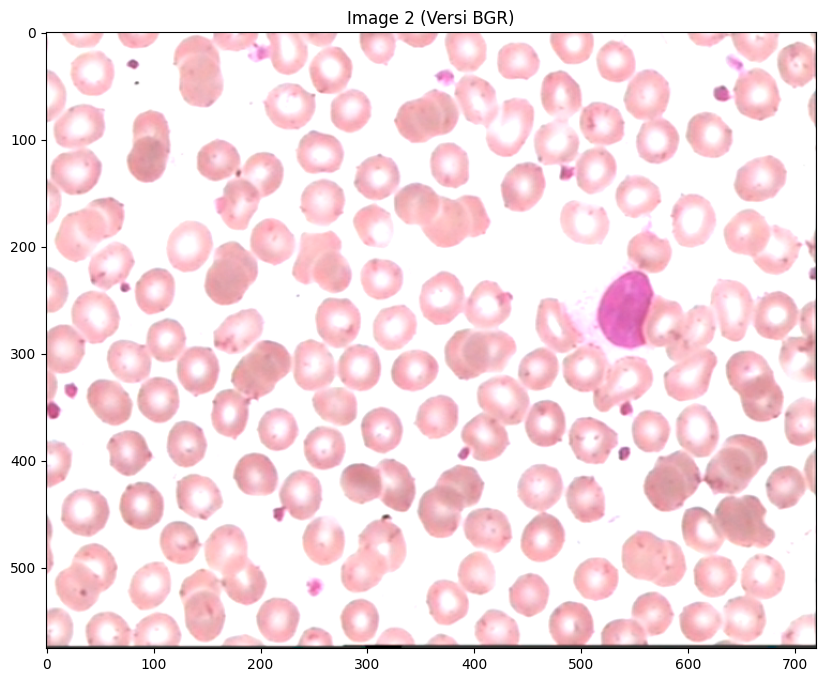

In [30]:
# Menampilkan Image Versi BGR
plt.imshow(image_ori_2)
plt.title("Image 2 (Versi BGR)")

## Baca image RGB

Text(0.5, 1.0, 'Image 2 (Versi RGB)')

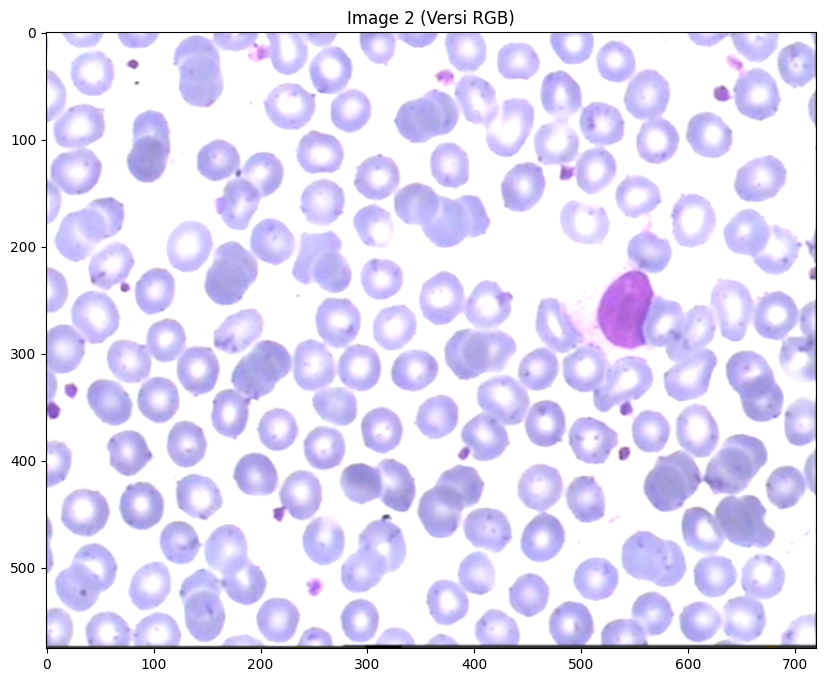

In [31]:
# Menampilkan Image versi RGB
image_rgb_2=cv2.cvtColor(image_ori_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb_2)
plt.title("Image 2 (Versi RGB)")

## konversi image RGB ke grayscale

Text(0.5, 1.0, 'Image 2 (Versi Grayscale)')

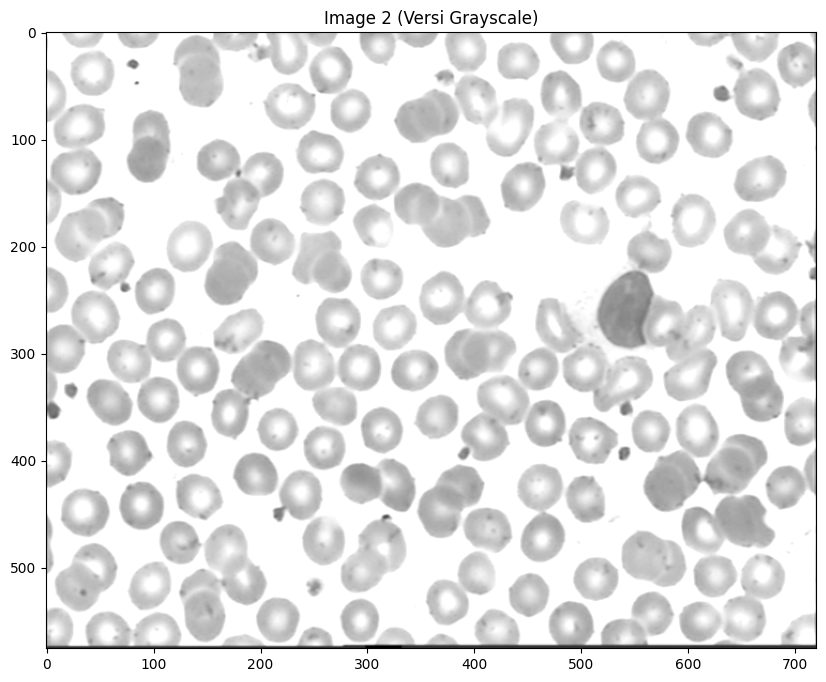

In [36]:
# Menampilkan Image versi Grayscale
image_gray_2=cv2.cvtColor(image_rgb_2, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray_2, cmap='gray')
plt.title("Image 2 (Versi Grayscale)")

## konversi image grayscale ke binary image

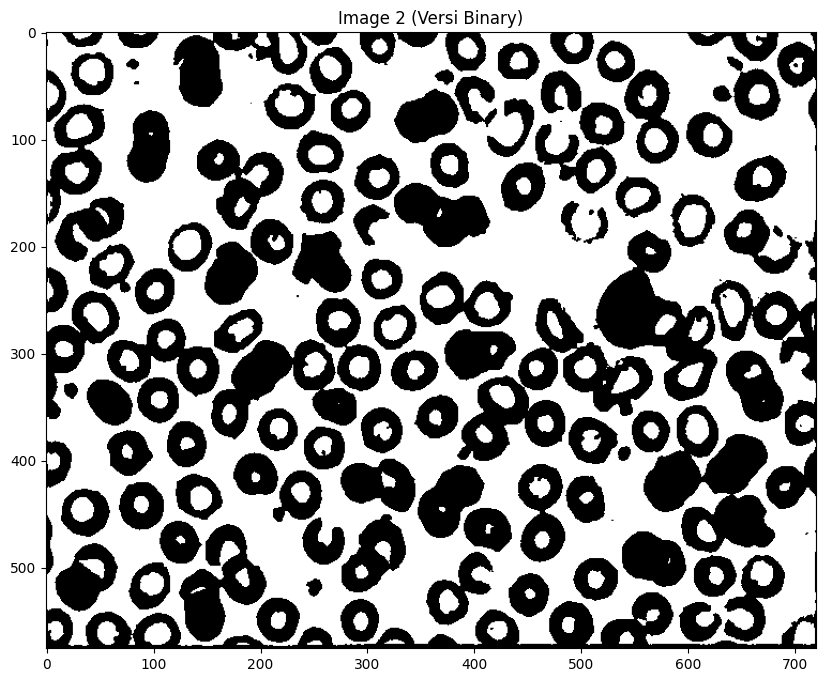

In [35]:
# Menentukan nilai ambang menggunakan metode Otsu
_, image_binary_2 = cv2.threshold(image_gray_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan binary Image
plt.imshow(image_binary_2, cmap='gray')
plt.title("Image 2 (Versi Binary)")
plt.show()

## Image Processing

### Image Segmentation

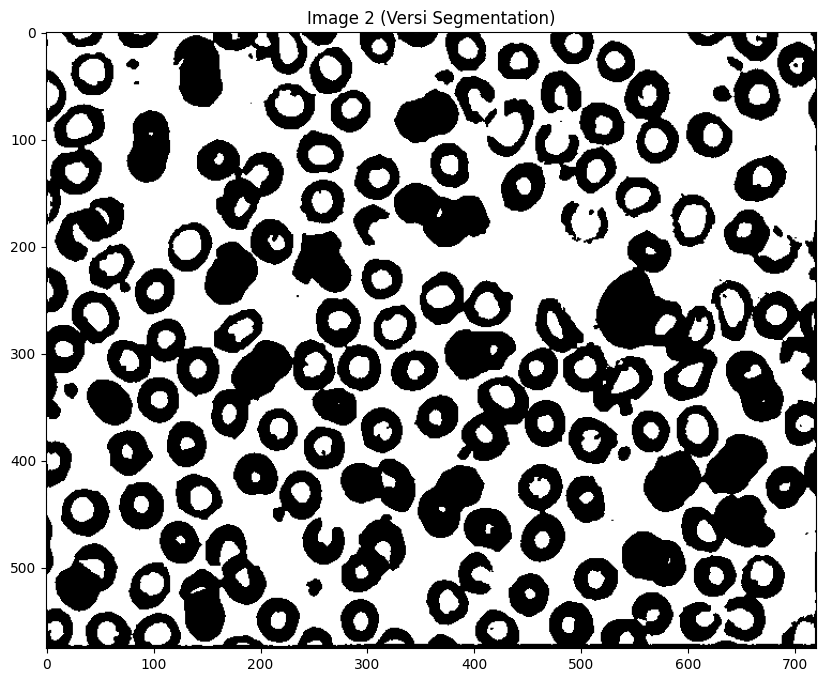

In [39]:
# Tentukan threshold value
threshold_value = 128

# Segmentasi berdasarkan thresholding
_, image_segmentation = cv2.threshold(image_binary_2, threshold_value, 255, cv2.THRESH_BINARY)

# Menampilkan segmentation Image
plt.imshow(image_segmentation, cmap='gray')
plt.title("Image 2 (Versi Segmentation)")
plt.show()

### Median Filtering

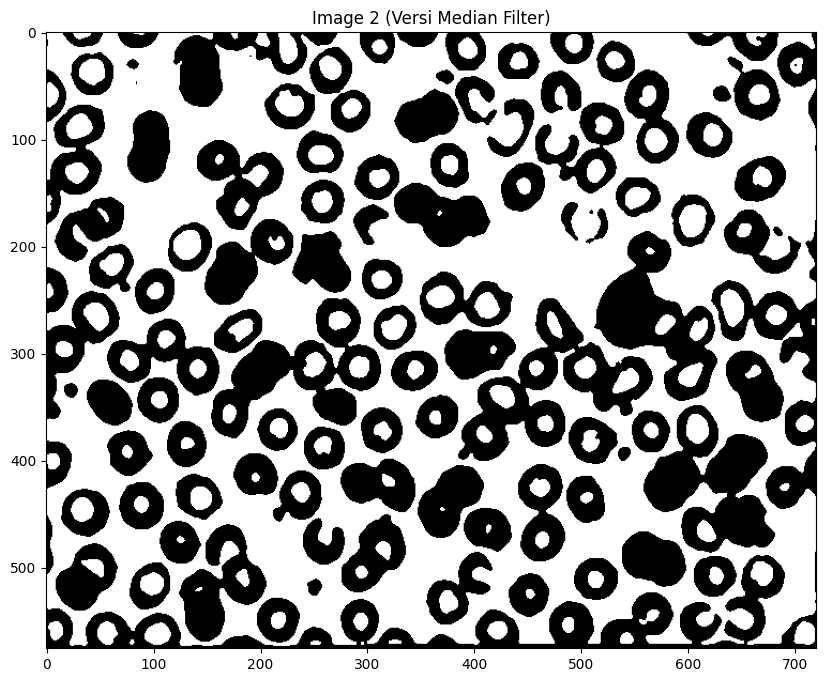

In [42]:
median_filter = cv2.medianBlur(image_segmentation,5)
plt.imshow(cv2.cvtColor(median_filter,cv2.COLOR_BGR2RGB))
plt.title("Image 2 (Versi Median Filter)")
plt.show()

### Edge Detection

In [41]:
# Membuat Edge Detection Sobel Operator Function
scale = 1
delta = 0
ddepth = cv2.CV_16S
def SobelOperator(input_image):
    grad_x = cv2.Sobel(input_image, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(input_image, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad

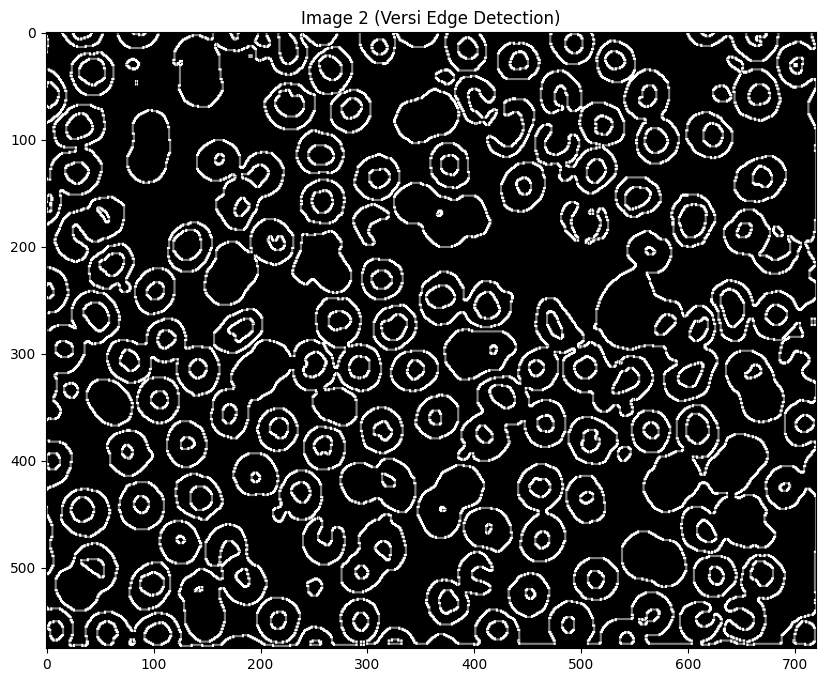

In [43]:
# Menngaplikasikan Metode Sobel Operator dari Edge Detection ke dalam Image
edgedetect_image = SobelOperator(median_filter)
plt.imshow(edgedetect_image, cmap='gray')
plt.title("Image 2 (Versi Edge Detection)")
plt.show()

### Erosi Image

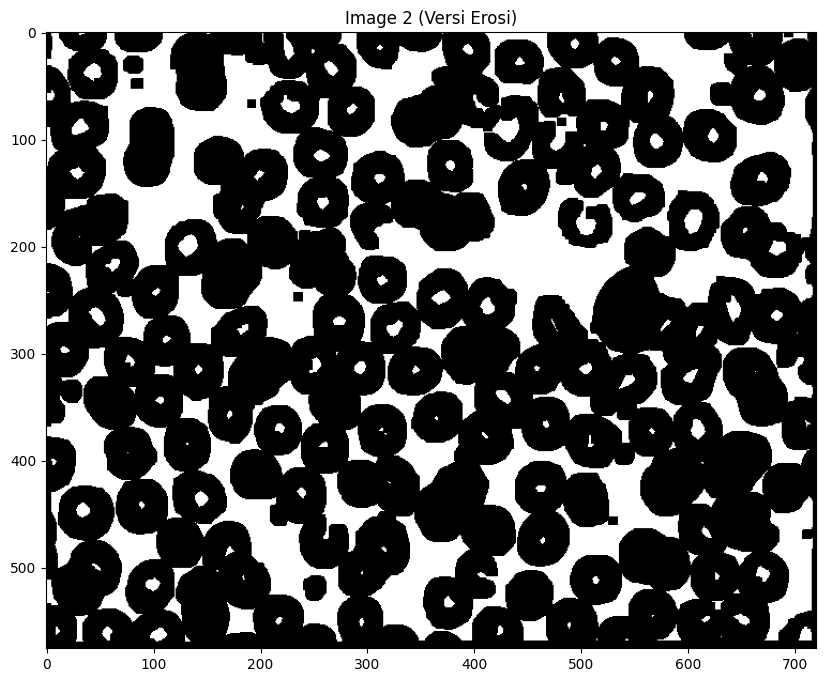

In [63]:
# Definisikan kernel/structuring element untuk erosi
kernel = np.ones((8, 8), np.uint8)

# Lakukan erosi pada gambar
erosi_image = cv2.erode(image_binary_2, kernel)

plt.imshow(erosi_image, cmap='gray')
plt.title("Image 2 (Versi Erosi)")
plt.show()

## Membentuk Boundary

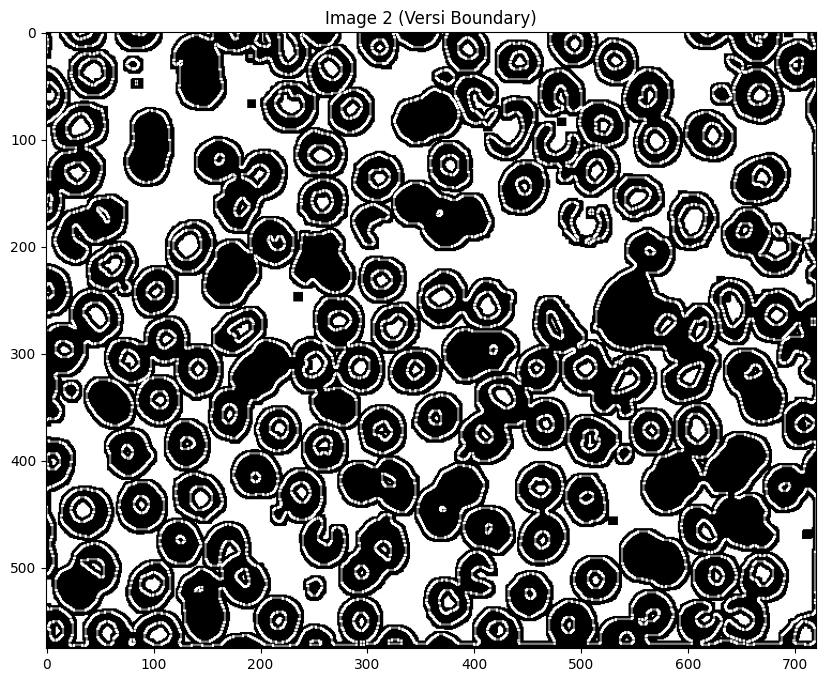

In [133]:
# Hitung boundary image
boundary_image = cv2.absdiff(edgedetect_image, erosi_image)

plt.imshow(boundary_image, cmap='gray')
plt.title("Image 2 (Versi Boundary)")
plt.show()

## Menghitung Cell Darah

Jumlah sel darah yang terdeteksi: 83


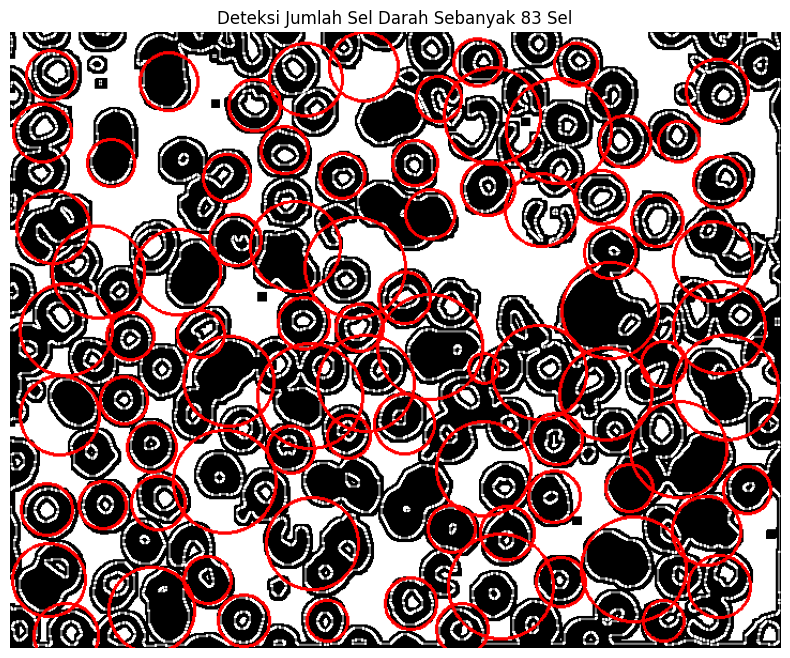

In [140]:
# Konversi boundary image ke versi RGB
boundary_image_rgb = cv2.cvtColor(boundary_image, cv2.COLOR_GRAY2RGB)

# Menerapkan Transformasi Hough untuk mendeteksi lingkaran
circles = cv2.HoughCircles(boundary_image, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=10, maxRadius=50)

# Ubah hasil deteksi lingkaran menjadi array integer
circles = np.uint16(np.around(circles))

# Gambar lingkaran hasil deteksi pada gambar asli
for circle in circles[0, :]:
    center = (circle[0], circle[1])
    radius = circle[2]
    cv2.circle(boundary_image_rgb, center, radius, (255, 0, 0), 2)

# Hitung jumlah sel darah yang terdeteksi
num_cells = len(circles[0])
print("Jumlah sel darah yang terdeteksi:", num_cells)

# Tampilkan gambar hasil deteksi
plt.imshow(boundary_image_rgb)
plt.title("Deteksi Jumlah Sel Darah Sebanyak {} Sel".format(num_cells))
plt.axis("off")
plt.show()

## Menyimpan File Input

In [81]:
cv2.imwrite("input_bgr_image_2.png", image_ori_2)

True

In [82]:
cv2.imwrite("input_rgb_image_2.png", image_rgb_2)

True

In [83]:
cv2.imwrite("input_grayscale_image_2.png", image_gray_2)

True

In [84]:
cv2.imwrite("input_binary_image_2.png", image_binary_2)

True

## Menyimpan File Output

In [85]:
cv2.imwrite("output_boundary_image.png", boundary_image)

True

In [141]:
cv2.imwrite("output_hitung_sel_darah_image sebanyak {} Sel.png".format(num_cells), boundary_image_rgb)

True